In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle
from tensorflow.keras.utils import plot_model


In [2]:
data1 = pd.read_csv('data/data1.csv')
data2 = pd.read_csv('data/data2.csv')
data3 = pd.read_csv('data/data3.csv')
data4 = pd.read_csv('data/data4.csv')

data = pd.concat([data1,data2,data3,data4])

In [3]:
X = data[['rssi', 'A1', 'P1']].values
y = data[['taget']].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=1)


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

c:\Users\abdul\Projects\har-tensorflow\senior-design\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=300, batch_size=20)
model.summary()

Epoch 1/300
58/58 [==============================] - 1s 7ms/step - loss: 0.1119 - accuracy: 0.9588 - val_loss: 0.2925 - val_accuracy: 0.9161
Epoch 2/300
58/58 [==============================] - 0s 3ms/step - loss: 0.0916 - accuracy: 0.9684 - val_loss: 0.3005 - val_accuracy: 0.9091
Epoch 3/300
58/58 [==============================] - 0s 3ms/step - loss: 0.0885 - accuracy: 0.9702 - val_loss: 0.3002 - val_accuracy: 0.9056
Epoch 4/300
58/58 [==============================] - 0s 3ms/step - loss: 0.0877 - accuracy: 0.9711 - val_loss: 0.2990 - val_accuracy: 0.9056
Epoch 5/300
58/58 [==============================] - 0s 3ms/step - loss: 0.0874 - accuracy: 0.9702 - val_loss: 0.3017 - val_accuracy: 0.9021
Epoch 6/300
58/58 [==============================] - 0s 3ms/step - loss: 0.0869 - accuracy: 0.9711 - val_loss: 0.2992 - val_accuracy: 0.9126
Epoch 7/300
58/58 [==============================] - 0s 4ms/step - loss: 0.0872 - accuracy: 0.9684 - val_loss: 0.2974 - val_accuracy: 0.9091
Epoch 8/300
5

Text(0.5, 0, 'epochs')

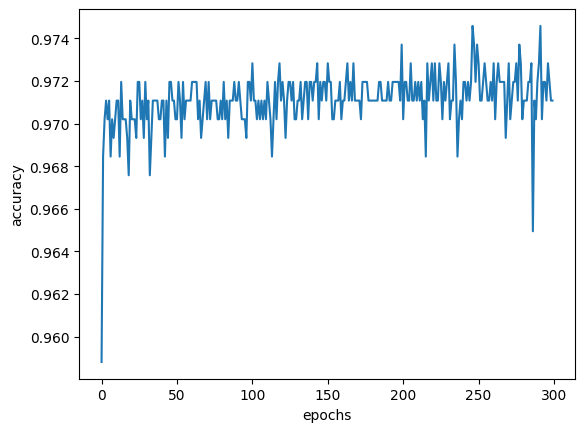

In [13]:
accuracy = history.history['accuracy']
plt.plot(accuracy)
plt.ylabel('accuracy')
plt.xlabel('epochs')

In [10]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 59ms/step


In [11]:
new_prediction = model.predict(scaler.transform(np.array([[-72, 1,-13]])))

1/1 [==============================] - 0s 14ms/step


In [12]:
model_file = 'model-tensor.pickle'
pickle.dump(model, open(model_file, 'wb'))

scaler_file = 'scaler-tensor.pickle'
pickle.dump(scaler, open(scaler_file, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-16 18:11:45         2455
metadata.json                                  2023-01-16 18:11:45           64
variables.h5                                   2023-01-16 18:11:45       110808
